In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
# !pip install scikit-learn
# !pip install xgboost

| 영어 변수명                      | 한글 번역                                 |
| --------------------------- | ------------------------------------- |
| `PatientID`                 | 환자 ID                                 |
| `Age`                       | 나이                                    |
| `Gender`                    | 성별                                    |
| `Ethnicity`                 | 인종                                    |
| `EducationLevel`            | 교육 수준                                 |
| `BMI`                       | 체질량지수 (BMI)                           |
| `Smoking`                   | 흡연 여부                                 |
| `AlcoholConsumption`        | 음주량                                   |
| `PhysicalActivity`          | 신체활동 수준                               |
| `DietQuality`               | 식단의 질                                 |
| `SleepQuality`              | 수면의 질                                 |
| `FamilyHistoryAlzheimers`   | 알츠하이머 가족력                             |
| `CardiovascularDisease`     | 심혈관 질환 여부                             |
| `Diabetes`                  | 당뇨병 여부                                |
| `Depression`                | 우울증 여부                                |
| `HeadInjury`                | 두부 외상 여부                              |
| `Hypertension`              | 고혈압 여부                                |
| `SystolicBP`                | 수축기 혈압                                |
| `DiastolicBP`               | 이완기 혈압                                |
| `CholesterolTotal`          | 총 콜레스테롤                               |
| `CholesterolLDL`            | LDL 콜레스테롤 (나쁜 콜레스테롤)                  |
| `CholesterolHDL`            | HDL 콜레스테롤 (좋은 콜레스테롤)                  |
| `CholesterolTriglycerides`  | 중성지방                                  |
| `MMSE`                      | 간이 정신상태 검사 점수 (MMSE)                  |
| `FunctionalAssessment`      | 기능 평가 점수                              |
| `MemoryComplaints`          | 기억력 저하 호소                             |
| `BehavioralProblems`        | 행동 문제                                 |
| `ADL`                       | 일상생활수행능력 (Activities of Daily Living) |
| `Confusion`                 | 혼란                                    |
| `Disorientation`            | 방향감각 상실                               |
| `PersonalityChanges`        | 성격 변화                                 |
| `DifficultyCompletingTasks` | 과제 수행의 어려움                            |
| `Forgetfulness`             | 건망증                                   |
| `Diagnosis`                 | 진단 여부 (0: 정상, 1: 알츠하이머)               |
| `DoctorInCharge`            | 담당 의사                                 |
| `AgeGroup`                  | 나이대 (60s, 70s 등)                      |

In [2]:
df_real = pd.read_csv('./alzheimers_disease_data.csv', sep=',')

df_real.info()
# tmp = df_real.loc[:, :'Diabetes']
# tmp.describe()
# tmp = df_real.loc[:, 'Diabetes':'FunctionalAssessment']
# tmp.describe()
tmp = df_real.loc[:, 'FunctionalAssessment':]
tmp.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
df_real['Diagnosis'].value_counts()

Diagnosis
0    1389
1     760
Name: count, dtype: int64

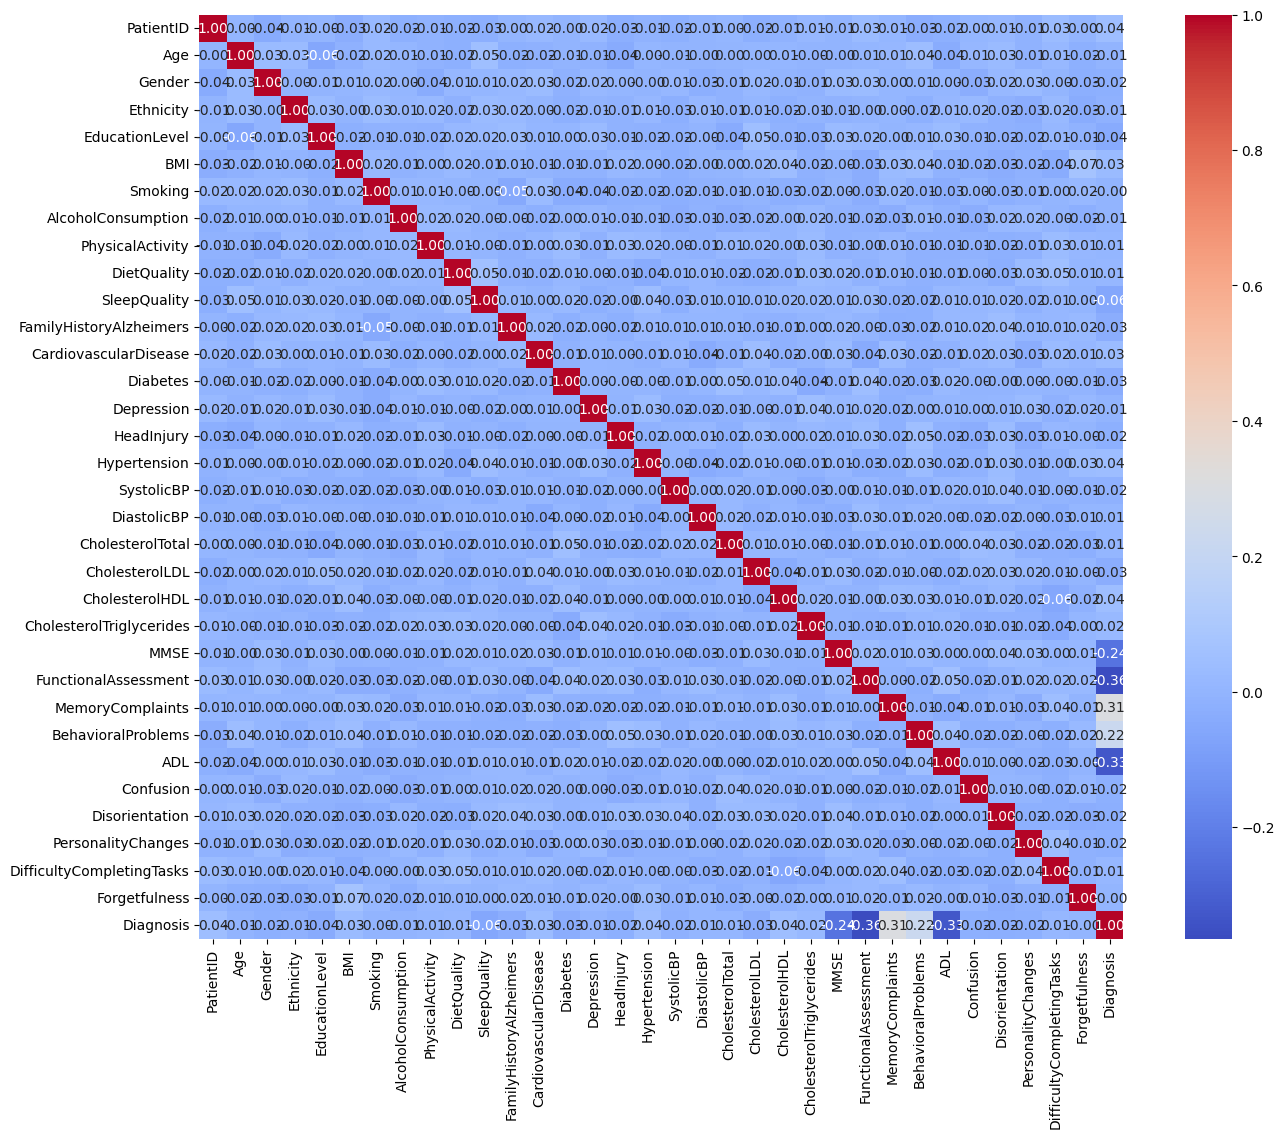

In [4]:
# 상관관계 분석 대상 수치형 변수 선택 (datetime 제외)
df = df_real[['Gender' , 'AlcoholConsumption', 'PhysicalActivity', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CholesterolTriglycerides','DietQuality', 'BMI', 'MemoryComplaints', 'Diagnosis' ]]
numeric_cols = df_real.select_dtypes(include=["float64", "int64"]).columns

# 상관계수 행렬 계산
corr = df_real[numeric_cols].corr()

# 히트맵 시각화
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
# plt.title("📊 상관관계 히트맵")
plt.show()


In [ ]:
related_df = df[['MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL']]

corr = related_df.corr()

# 히트맵 시각화
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
# plt.title("📊 상관관계 히트맵")
plt.show()

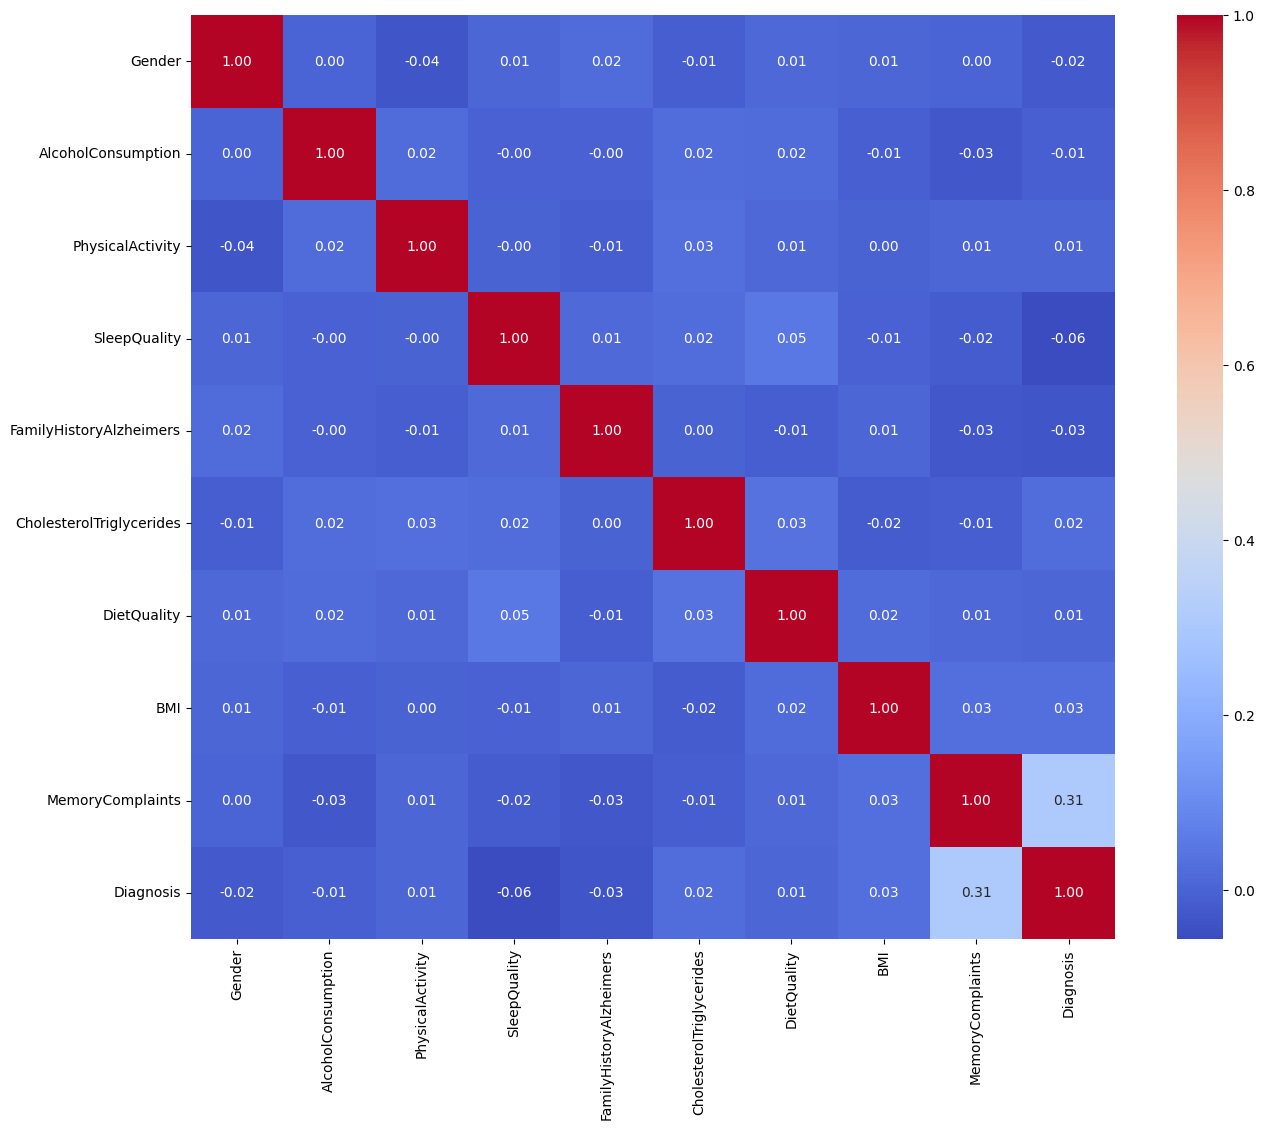

In [5]:
sc = StandardScaler()

df_scaled = sc.fit_transform(df)

df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

corr = df_scaled.corr()

# 히트맵 시각화
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
# plt.title("📊 상관관계 히트맵")
plt.show()


In [6]:
# # 1. 특징과 타겟 분리
# X = df.drop(columns=["date", "target"])
# y = df["target"]

# # 2. 학습용/테스트용 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 3. 랜덤포레스트 분류기 학습
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

# # 4. 변수 중요도 추출
# importances = rf_model.feature_importances_
# features = X.columns
# importance_df = pd.DataFrame({
#     'feature': features,
#     'importance': importances
# }).sort_values(by='importance', ascending=False)

# # 5. 시각화
# plt.figure(figsize=(12, 8))
# sns.barplot(data=importance_df, x='importance', y='feature', palette='viridis')
# plt.title("랜덤포레스트 변수 중요도", fontsize=15)
# plt.xlabel("중요도")
# plt.ylabel("특성")
# plt.tight_layout()
# plt.grid(True)
# plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    2149 non-null   int64  
 1   AlcoholConsumption        2149 non-null   float64
 2   PhysicalActivity          2149 non-null   float64
 3   SleepQuality              2149 non-null   float64
 4   FamilyHistoryAlzheimers   2149 non-null   int64  
 5   CholesterolTriglycerides  2149 non-null   float64
 6   DietQuality               2149 non-null   float64
 7   BMI                       2149 non-null   float64
 8   MemoryComplaints          2149 non-null   int64  
 9   Diagnosis                 2149 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 168.0 KB


### column들 scale한 dataframe

In [8]:
df.describe()

scaled_df = df.copy()
tmp_df = df.drop(['Gender', 'FamilyHistoryAlzheimers', 'MemoryComplaints', 'Diagnosis'], axis=1)
tmp_df
scaler = StandardScaler()
tmp_df = scaler.fit_transform(tmp_df)
tmp_df = pd.DataFrame(tmp_df, columns=['AlcoholConsumption', 'PhysicalActivity', 'SleepQuality', 'CholesterolTriglycerides', 'DietQuality', 'BMI'])

scaled_df.loc[:, ['AlcoholConsumption', 'PhysicalActivity', 'SleepQuality', 'CholesterolTriglycerides', 'DietQuality', 'BMI']] = tmp_df
scaled_df.describe()

,Gender,AlcoholConsumption,PhysicalActivity,SleepQuality,FamilyHistoryAlzheimers,CholesterolTriglycerides,DietQuality,BMI,MemoryComplaints,Diagnosis
count,2149.000000,2.149000e+03,2.149000e+03,2.149000e+03,2149.000000,2.149000e+03,2.149000e+03,2.149000e+03,2149.000000,2149.000000
mean,0.506282,-3.637027e-17,-6.447456e-17,-5.455540e-17,0.252210,9.092566e-17,-2.124354e-16,3.967665e-16,0.208004,0.353653
std,0.500077,1.000233e+00,1.000233e+00,1.000233e+00,0.434382,1.000233e+00,1.000233e+00,1.000233e+00,0.405974,0.478214
min,0.000000,-1.743649e+00,-1.721177e+00,-1.728968e+00,0.000000,-1.744499e+00,-1.713585e+00,-1.752670e+00,0.000000,0.000000
25%,0.000000,-8.511373e-01,-8.225290e-01,-8.893586e-01,0.000000,-8.895215e-01,-8.715108e-01,-8.376512e-01,0.000000,0.000000
50%,1.000000,-1.824512e-02,-5.383387e-02,3.661895e-02,0.000000,1.981588e-02,2.852085e-02,2.331380e-02,0.000000,0.000000
75%,1.000000,8.891560e-01,8.778833e-01,8.572323e-01,1.000000,8.489115e-01,8.821022e-01,8.611819e-01,0.000000,1.000000
max,1.000000,1.728434e+00,1.773912e+00,1.672426e+00,1.000000,1.683556e+00,1.720962e+00,1.709740e+00,1.000000,1.000000


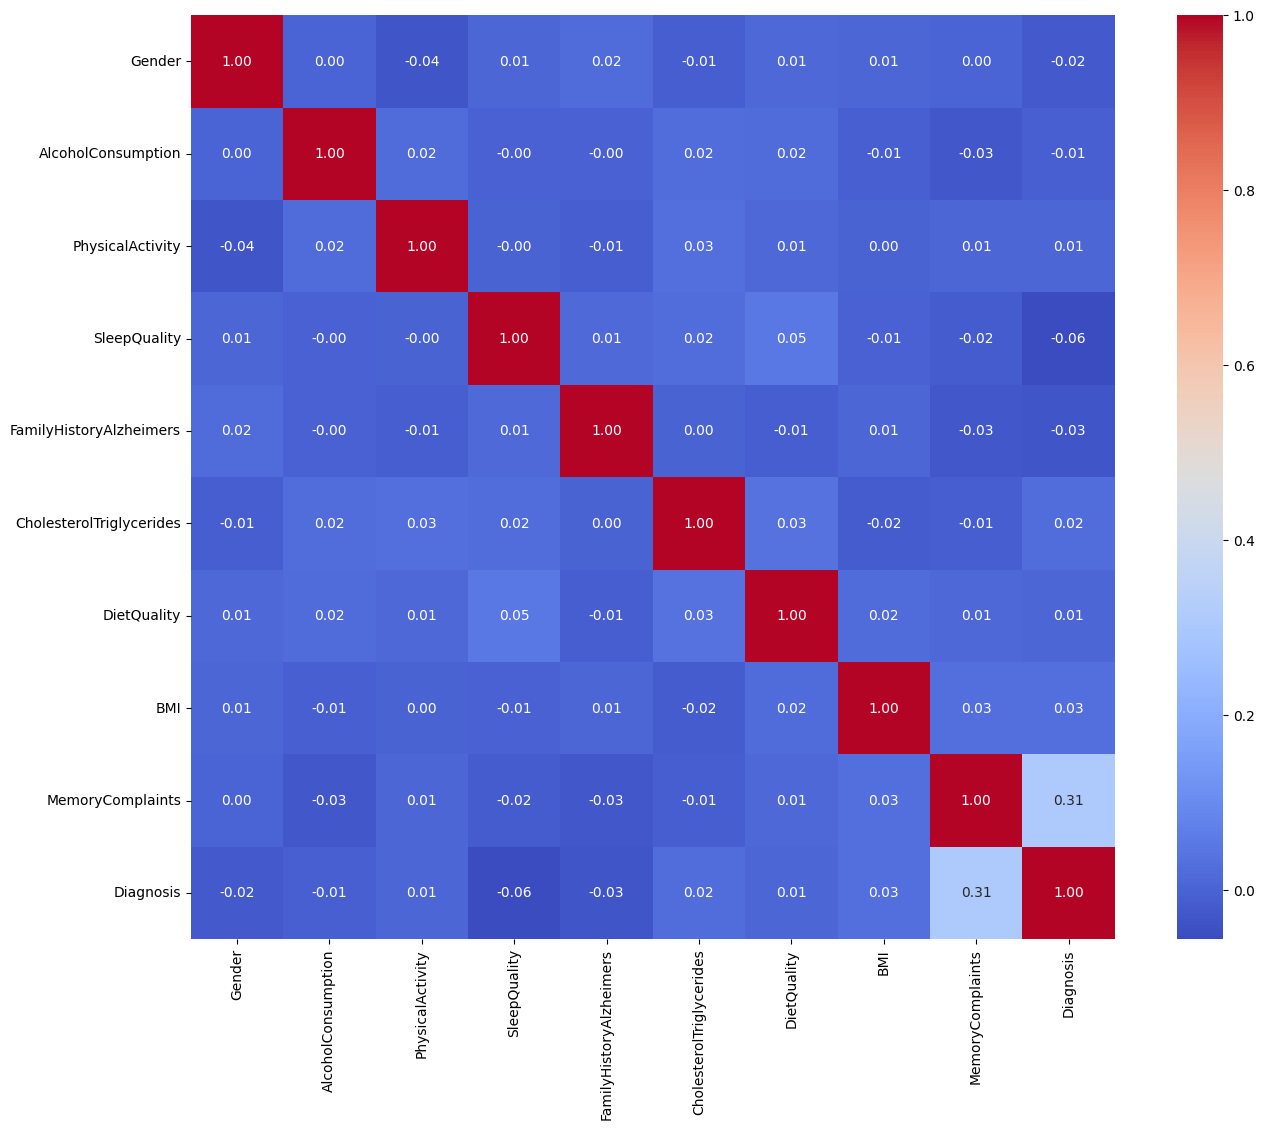

In [9]:
corr = scaled_df.corr()

# 히트맵 시각화
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
# plt.title("📊 상관관계 히트맵")
plt.show()


### 테스트

In [10]:
from sklearn.linear_model import LogisticRegression

numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
X = df[numeric_cols].drop('Diagnosis', axis=1)
y = df['Diagnosis']
# X = scaled_df.drop('Diagnosis', axis=1)
# y = scaled_df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LogisticRegression()

lr.fit(X_train, y_train)

X_train.shape, X_test.shape


c:\Users\shin\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


((1611, 9), (538, 9))

In [11]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.7045313469894475, 0.7026022304832714)

### GridSearchCV로 SVC의 최적 파라미터 찾기

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# model = SVC()
# params = {
    # 'kernel': ['linear', 'rbf'],
#     'C': [0.1, 0.5, 1],
#     'gamma': [0.1, 0.5, 1]
# }

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


# grid = GridSearchCV(model, params, scoring='accuracy', cv=5)
# grid.fit(X_train, y_train)

# best = grid.best_estimator_
best = SVC(kernel='linear')


In [13]:
# grid.best_params_
best.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [14]:
# MemoryComplaints 를 넣은 SVC 모델
best.score(X_train, y_train), best.score(X_test, y_test)

(0.7051520794537555, 0.7026022304832714)

In [15]:
y_pred = best.predict(X_test)
print(y_pred.shape)
print("\n📊 혼동 행렬:\n", confusion_matrix(y_test, y_pred))
print("\n📋 분류 리포트:\n", classification_report(y_test, y_pred))

(538,)

📊 혼동 행렬:
 [[302  40]
 [120  76]]

📋 분류 리포트:
               precision    recall  f1-score   support

           0       0.72      0.88      0.79       342
           1       0.66      0.39      0.49       196

    accuracy                           0.70       538
   macro avg       0.69      0.64      0.64       538
weighted avg       0.69      0.70      0.68       538



### Scaler 적용

In [16]:
from sklearn.preprocessing import StandardScaler

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.99813953, -0.65213979,  1.0806199 , ..., -0.89545573,
        -1.64191132, -0.50852114],
       [-0.99813953, -0.44687509,  1.24230102, ...,  0.30184268,
         0.12734661,  1.96648658],
       [ 1.00186393,  0.06554592, -0.90048207, ...,  1.63270371,
         0.19606078,  1.96648658],
       ...,
       [-0.99813953, -0.09034484,  1.07890858, ..., -0.24024742,
         0.21309241, -0.50852114],
       [ 1.00186393, -1.71188583,  0.47137715, ...,  1.4086422 ,
        -0.26846415, -0.50852114],
       [-0.99813953,  1.71835888,  1.77751542, ...,  0.35908737,
        -1.60703567, -0.50852114]], shape=(1611, 9))

In [17]:
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)
model.score(X_train_scaled, y_train), model.score(X_test_scaled, y_test)

(0.7051520794537555, 0.7026022304832714)

In [18]:
y_pred = model.predict(X_test_scaled)
print(y_pred.shape)
print("\n📊 혼동 행렬:\n", confusion_matrix(y_test, y_pred))
print("\n📋 분류 리포트:\n", classification_report(y_test, y_pred))

(538,)

📊 혼동 행렬:
 [[302  40]
 [120  76]]

📋 분류 리포트:
               precision    recall  f1-score   support

           0       0.72      0.88      0.79       342
           1       0.66      0.39      0.49       196

    accuracy                           0.70       538
   macro avg       0.69      0.64      0.64       538
weighted avg       0.69      0.70      0.68       538



### hyperparam tuning

In [19]:
model = SVC(kernel='linear')
params = {
    'C': [0.1, 0.5],
#    'gamma': [0.1, 0.5]
}

# grid = GridSearchCV(model, params, scoring='accuracy', cv=5)
# grid.fit(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X.describe()
# tuned_model = grid.best_estimator_

,Gender,AlcoholConsumption,PhysicalActivity,SleepQuality,FamilyHistoryAlzheimers,CholesterolTriglycerides,DietQuality,BMI,MemoryComplaints
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,0.506282,10.039442,4.920202,7.051081,0.252210,228.281496,4.993138,27.655697,0.208004
std,0.500077,5.757910,2.857191,1.763573,0.434382,101.986721,2.909055,7.217438,0.405974
min,0.000000,0.002003,0.003616,4.002629,0.000000,50.407194,0.009385,15.008851,0.000000
25%,0.000000,5.139810,2.570626,5.482997,0.000000,137.583222,2.458455,21.611408,0.000000
50%,1.000000,9.934412,4.766424,7.115646,0.000000,230.301983,5.076087,27.823924,0.000000
75%,1.000000,15.157931,7.427899,8.562521,1.000000,314.839046,7.558625,33.869778,0.000000
max,1.000000,19.989293,9.987429,9.999840,1.000000,399.941862,9.998346,39.992767,1.000000


In [20]:
# grid.best_params_
tuned_model = SVC(kernel='linear', C=0.5)
tuned_model.fit(X_train, y_train)

tuned_model.score(X_train, y_train), tuned_model.score(X_test, y_test)

(0.7051520794537555, 0.7026022304832714)

In [21]:
y_pred = tuned_model.predict(X_test)
print(y_pred.shape)
print("\n📊 혼동 행렬:\n", confusion_matrix(y_test, y_pred))
print("\n📋 분류 리포트:\n", classification_report(y_test, y_pred))

(538,)

📊 혼동 행렬:
 [[302  40]
 [120  76]]

📋 분류 리포트:
               precision    recall  f1-score   support

           0       0.72      0.88      0.79       342
           1       0.66      0.39      0.49       196

    accuracy                           0.70       538
   macro avg       0.69      0.64      0.64       538
weighted avg       0.69      0.70      0.68       538



### Tuning + Scaler

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
tuned_scaled_model = SVC(kernel='linear', C=10, gamma=0.1)

tuned_scaled_model.fit(X_train_scaled, y_train)

tuned_scaled_model.score(X_train_scaled, y_train), tuned_scaled_model.score(X_test_scaled, y_test)


(0.7051520794537555, 0.7026022304832714)

In [47]:
y_pred = tuned_scaled_model.predict(X_test_scaled)
print(y_pred.shape)
print("\n📊 혼동 행렬:\n", confusion_matrix(y_test, y_pred))
print(y_pred.shape)
print("\n📊 혼동 행렬:\n", confusion_matrix(y_test, y_pred))
print("\n📋 분류 리포트:\n", classification_report(y_test, y_pred))
print("\n📋 분류 리포트:\n", classification_report(y_test, y_pred))

(538,)

📊 혼동 행렬:
 [[302  40]
 [120  76]]
(538,)

📊 혼동 행렬:
 [[302  40]
 [120  76]]

📋 분류 리포트:
               precision    recall  f1-score   support

           0       0.72      0.88      0.79       342
           1       0.66      0.39      0.49       196

    accuracy                           0.70       538
   macro avg       0.69      0.64      0.64       538
weighted avg       0.69      0.70      0.68       538


📋 분류 리포트:
               precision    recall  f1-score   support

           0       0.72      0.88      0.79       342
           1       0.66      0.39      0.49       196

    accuracy                           0.70       538
   macro avg       0.69      0.64      0.64       538
weighted avg       0.69      0.70      0.68       538



### PCA

In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
pca.fit(X)
pca_data = pca.transform(X)
 

In [56]:
X_train, X_test, y_train, y_test = train_test_split(pca_data, y, random_state=42)

# SVC 학습
clf = SVC(kernel='linear', C=10)
clf.fit(X_train, y_train)

# 정확도 계산
score = clf.score(X_test, y_test)
print("테스트 정확도:", score)

테스트 정확도: 0.6356877323420075


In [57]:
y_pred = clf.predict(X_test)

print("\n📊 혼동 행렬:\n", confusion_matrix(y_test, y_pred))
print("\n📋 분류 리포트:\n", classification_report(y_test, y_pred))


📊 혼동 행렬:
 [[342   0]
 [196   0]]

📋 분류 리포트:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78       342
           1       0.00      0.00      0.00       196

    accuracy                           0.64       538
   macro avg       0.32      0.50      0.39       538
weighted avg       0.40      0.64      0.49       538



c:\Users\shin\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\shin\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\shin\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pca_data, y, random_state=42)

# SVC 학습
clf = SVC(kernel='rbf', C=10)
clf.fit(X_train, y_train)

# 정확도 계산
score = clf.score(X_test, y_test)
print("테스트 정확도:", score)

테스트 정확도: 0.6356877323420075


### MemoryComplaints를 제외하고 학습

In [25]:
new_X = X.drop('MemoryComplaints', axis=1)

X_train, X_test, y_train, y_test = train_test_split(new_X, y, random_state=0)

In [ ]:
# MemoryComplaints를 뺀 SVC 모델
ec_clf = SVC(kernel='linear', C=0.5, gamma=0.1)
ec_clf.fit(X_train, y_train)
ec_clf.score(X_train, y_train), ec_clf.score(X_test, y_test)

(0.6486654252017381, 0.6394052044609665)

In [29]:
y_pred = ec_clf.predict(X_test)
print(y_pred.shape)
print("\n📊 혼동 행렬:\n", confusion_matrix(y_test, y_pred))
print("\n📋 분류 리포트:\n", classification_report(y_test, y_pred))

(538,)

📊 혼동 행렬:
 [[344   0]
 [194   0]]

📋 분류 리포트:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78       344
           1       0.00      0.00      0.00       194

    accuracy                           0.64       538
   macro avg       0.32      0.50      0.39       538
weighted avg       0.41      0.64      0.50       538



c:\Users\shin\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\shin\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\shin\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is